# Estimation of Seismic Source Signature

In [1]:
import numpy as np
import matplotlib.pyplot as plt

##### Initializing traces with zeros

In [2]:
trace1 = np.zeros(1000)
trace2 = np.zeros(1000)
trace3 = np.zeros(1000)

#### Our model
We consider a single layer Earth model with layer thickness of 500m, and the wave velocity is $1500ms^{-1}$.
First we consider the source at $x=0m$, and 2 receivers at $x=200m$ and $x=500m$. We record the trace1 and trace2.
Then we move our source to one of the receiver position, i.e. $x=200m$, the record the signal at receiver 2($x=500m$), trace3.

In [3]:
rec1 = 200
rec2 = 500
depth = 500
vel = 1500

t1 = round(1000*2*np.sqrt(depth**2+(rec1/2)**2)/vel)
t2 = round(1000*2*np.sqrt(depth**2+(rec2/2)**2)/vel)
t3 = round(1000*2*np.sqrt(depth**2+((rec2-rec1)/2)**2)/vel)

trace1[t1] = 1
trace2[t2] = 1
trace3[t3] = 1

#### Source wavelet
We are considering a known ricker wavelet of frequency $30Hz$ as the source wavelet.

In [4]:
t = np.arange(-.5,.5,.001)
f = 30
source = (1 - 2 * (np.pi*f*t)**2) * np.exp(-(np.pi*f*t)**2)

This source wavelet is convolved with the traces above to get the actual seismic signal.

In [5]:
SRC = np.fft.fft(source)
TRC1 = np.fft.fft(trace1)
TRC2 = np.fft.fft(trace2)
TRC3 = np.fft.fft(trace3)

TRC1 = TRC1 * SRC
TRC2 = TRC2 * SRC
TRC3 = TRC3 * SRC

trc1 = np.fft.ifft(TRC1)
trc2 = np.fft.ifft(TRC2)
trc3 = np.fft.ifft(TRC3)

By seismic interferometry, the virtual real source method says the source can be estimated by 
$$source = \frac{conjugation(trace1,trace2)}{trace3}$$
Conjugation of trace1 and trace2 will give the Green's function between $x=200m~~\&~~x=500m$, convolved with the autocorrelation of source function. 

In [6]:
epsilon = 10**-7
CC_TR12 = TRC1 * np.conjugate(TRC2)
S = CC_TR12 / (TRC3 + epsilon)
s = np.fft.ifft(S)

#### Ploting the result
The result is plotted below.
Note that the estimated wavelet has advanced in time domain, in order to align both signals, they are sliced over the wavlet region.

<IPython.core.display.Javascript object>


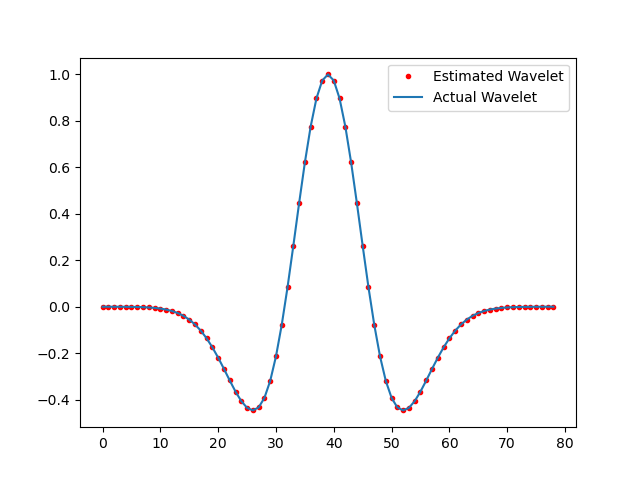

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [7]:
%matplotlib notebook

plt.plot(s[700:779],'r.')
plt.plot(source[461:540])
plt.legend(['Estimated Wavelet','Actual Wavelet'])